# <center>Concrete Strength Prediction</center>

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:Blue; border:0' role="tab" aria-controls="home"><center>Quick navigation</center></h3>

* [1. Introduction](#1)
* [2. Data Reading and Analysis](#2)
* [3. Data Exploration](#3)
* [4. Data Visualization](#4)  
* [5. Model Training](#5) <br>

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:orange; border:0' role="tab" aria-controls="home"><center>Introduction</center><a id=1></a></h3>
    
    
    
Dataset available at https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

Concrete is one of the most important materials in Civil Engineering. Knowing the compressive strength of concrete is very important when constructing a building or a bridge. The Compressive Strength of Concrete is a highly nonlinear function of ingredients used in making it and their characteristics. Thus, using Machine Learning to predict the Strength could be useful in generating a combination of ingredients which result in high Strength.

This notebook demonstrates the use of Machine Learning to predict Concrete Compressive Strength.

## Problem Statement
Predicting Compressive Strength of Concrete given its age and quantitative measurements of ingredients.

### Data Description
Data is obtained from UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

Number of instances - 1030
Number of Attributes - 9
Attribute breakdown - 8 quantitative inputs, 1 quantitative output
### Attribute information
* Inputs
* Cement
* Blast Furnace Slag
* Fly Ash
* Water
* Superplasticizer
* Coarse Aggregate
* Fine Aggregate
All above features measured in kg/$m^3$

Age (in days)
### Output
* Concrete Compressive Strength (Mpa)

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:orange; border:0' role="tab" aria-controls="home"><center>Data reading and Analysis</center><a id=2></a></h3>

In [1]:
# importing all important libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# loading data
data = pd.read_csv("../input/concrete-compressive-strength-data-set/concrete_data.csv")
data.head()

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0            1040.0            676.0   28                          79.99  
1            1055.0            676.0   28                          61.89  
2             932.0            594.0  270                          40.27  
3             932.0            594.0  365                          41.05  
4             978.4            825.5  360                          44.30

Checking for 'null' values

In [3]:
data.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

There are no null values in the data.so i think it's good sign and let's move into further steps 


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
data.describe()

cement  blast_furnace_slag      fly_ash        water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       superplasticizer  coarse_aggregate  fine_aggregate           age  \
count       1030.000000       1030.000000      1030.000000  1030.000000   
mean           6.204660        972.918932       773.580485    45.662136   
std            5.973841         77.753954        80.175980    63.169912   
min            0.000000        801.000000       594.000000     1.000000   
25%            0.000000        932.000000       730.950000     7.000000   
50%            6.400000        968.000000       779.500000    28.000000   
75%           10.200000       1029.400000       824.000000    56.000000   
max           32.200000       1145.000000       992.600000   365.000000   

       concrete_compressive_strength  
count                    1030.000000  
mean                       35.817961  
std                        16.705742  
min                         2.330000  
25%                        23.710000  
50%                        34.445000  
75%                        46.135000  
max                        82.600000

### Observations :
 * From here we can observe that maximum fly_ash is 200.10000 and minimum fly_ash is 0000 .
 * And maximum fine_aggregate is 540 ,Minimum ggregate is 594 .
 * maximum Water percentage in cement is 247 and Minimum water percentage in cement is 121.80
 * Minimum time taken i.e age 28 and maximum time taken i.e is 365 days 

In [6]:
data.tail()

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
1025             870.1            768.3   28                          44.28  
1026             817.9            813.4   28                          31.18  
1027             892.4            780.0   28                          23.70  
1028             989.6            788.9   28                          32.77  
1029             864.5            761.5   28                          32.40

In [7]:
data.shape

(1030, 9)

From here we can observe that 9 features are there and 1030 are rows .

<AxesSubplot:>

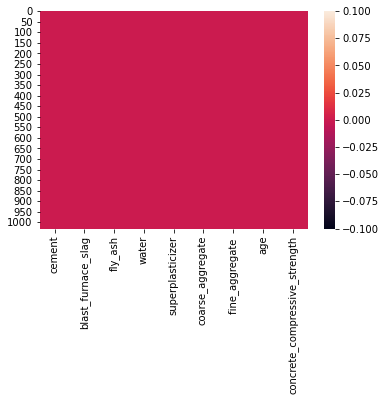

In [8]:
sns.heatmap(data.isnull())

Looking absolutely perfect 

### Remove columns where number of unique value is only 1.
Let's look at no of unique values for each column.We will remove all columns where number of unique value is only 1 because that will not make any sense in the analysis

In [9]:
unique = data.nunique()
unique = unique[unique.values == 1]

In [10]:
data.drop(labels = list(unique.index), axis =1, inplace=True)
print("So now we are left with",data.shape ,"rows & columns.")

So now we are left with (1030, 9) rows & columns.


> My observation's here are there is no duplicate values.

In [11]:
data.describe().transpose()

count        mean         std     min  \
cement                         1030.0  281.167864  104.506364  102.00   
blast_furnace_slag             1030.0   73.895825   86.279342    0.00   
fly_ash                        1030.0   54.188350   63.997004    0.00   
water                          1030.0  181.567282   21.354219  121.80   
superplasticizer               1030.0    6.204660    5.973841    0.00   
coarse_aggregate               1030.0  972.918932   77.753954  801.00   
fine_aggregate                 1030.0  773.580485   80.175980  594.00   
age                            1030.0   45.662136   63.169912    1.00   
concrete_compressive_strength  1030.0   35.817961   16.705742    2.33   

                                   25%      50%       75%     max  
cement                         192.375  272.900   350.000   540.0  
blast_furnace_slag               0.000   22.000   142.950   359.4  
fly_ash                          0.000    0.000   118.300   200.1  
water                          164.900  185.000   192.000   247.0  
superplasticizer                 0.000    6.400    10.200    32.2  
coarse_aggregate               932.000  968.000  1029.400  1145.0  
fine_aggregate                 730.950  779.500   824.000   992.6  
age                              7.000   28.000    56.000   365.0  
concrete_compressive_strength   23.710   34.445    46.135    82.6

In [12]:
df=data.copy()

In [13]:
#Deleting the duplicates entry in msidn column
df = df.drop_duplicates(keep='first')
df.shape

(1005, 9)

My Observation here is duplicate valules have been droped from the data set .
> And now 1005 rows and 9 features available .

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:orange; border:0' role="tab" aria-controls="home"><center>Data Exploration</center><a id=3></a></h3>

In [14]:
#Printing the object datatypes and their unique values.

for column in df.columns:
    if df[column].dtypes == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print('**********************************************************************************************************')
        print('\n')

### Observation:

There is no other features contain any uniques values ,so it's not an problem and now i'm going to move into further steps .

In [15]:
#Printing the float datatype columns and number of unique values in the particular columns.

for column in df.columns:
    if df[column].dtype==np.number:
        print(str(column) + ' : ' + str(df[column].nunique()))
        print(df[column].nunique())
        print('//////*******************************************************************************///////')

cement : 278
278
//////*******************************************************************************///////
blast_furnace_slag : 185
185
//////*******************************************************************************///////
fly_ash : 156
156
//////*******************************************************************************///////
water : 195
195
//////*******************************************************************************///////
superplasticizer : 111
111
//////*******************************************************************************///////
coarse_aggregate : 284
284
//////*******************************************************************************///////
fine_aggregate  : 302
302
//////*******************************************************************************///////
concrete_compressive_strength : 845
845
//////*******************************************************************************///////


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  after removing the cwd from sys.path.


In [16]:
# now i am going to explore data
df.head()

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0            1040.0            676.0   28                          79.99  
1            1055.0            676.0   28                          61.89  
2             932.0            594.0  270                          40.27  
3             932.0            594.0  365                          41.05  
4             978.4            825.5  360                          44.30

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1005 non-null   float64
 1   blast_furnace_slag             1005 non-null   float64
 2   fly_ash                        1005 non-null   float64
 3   water                          1005 non-null   float64
 4   superplasticizer               1005 non-null   float64
 5   coarse_aggregate               1005 non-null   float64
 6   fine_aggregate                 1005 non-null   float64
 7   age                            1005 non-null   int64  
 8   concrete_compressive_strength  1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


## Observations :
* From here we can observe two things 
  1. Only age feature is integer
  2. Other than age all other features are float 

In [18]:
df['concrete_compressive_strength'].value_counts()

31.35    4
33.40    4
41.05    4
23.52    4
44.28    3
        ..
9.56     1
27.42    1
25.46    1
23.08    1
27.87    1
Name: concrete_compressive_strength, Length: 845, dtype: int64

Text(0.5, 1.0, 'Correlation with target Variable that is concrete_compressive_strength column')

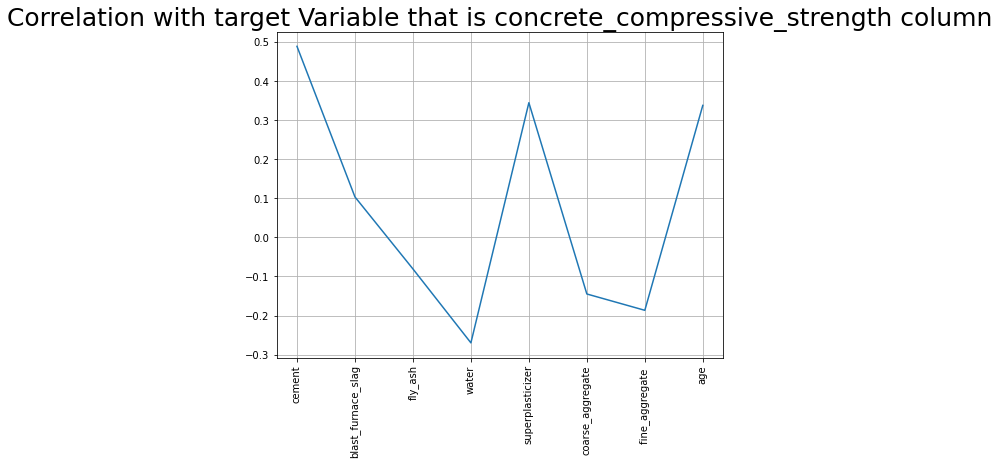

In [19]:

#Checking the correlation with target variable
plt.figure(figsize=(8,6))
df.drop('concrete_compressive_strength', axis=1).corrwith(df['concrete_compressive_strength']).plot(kind='line',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target Variable that is concrete_compressive_strength column",fontsize=25)

## Observations:
 * Cement is Highly Co-relate with Target variable compare to other variables .
 * Compare to all other features Water cor-relation with target feature is too low .


(array([ 45., 133., 155., 179., 193., 110.,  98.,  46.,  33.,  13.]),
 array([ 2.33 , 10.357, 18.384, 26.411, 34.438, 42.465, 50.492, 58.519,
        66.546, 74.573, 82.6  ]),
 <BarContainer object of 10 artists>)

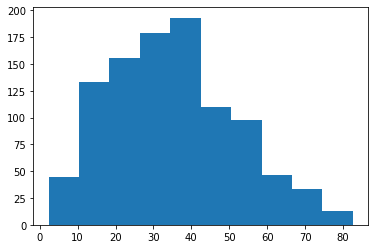

In [20]:
plt.hist((df.concrete_compressive_strength))

Most of the dataset's samples fall between 34 and 42 of 'concrete_compressive_strength' continous output class, with a positive skew

<AxesSubplot:xlabel='age'>

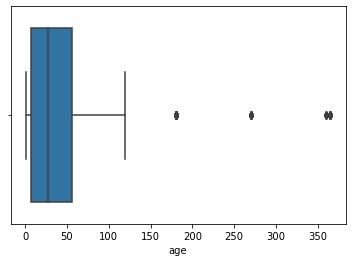

In [21]:
# Checking Outliers 
sns.boxplot(x=df['age'], data=df)

## Observations 
*  From here we can observe that age feature has four or five outliers present .In the sense most of the values lied in between 0-100 days .In very rare cases age values lie in between 150-350

<AxesSubplot:xlabel='fly_ash'>

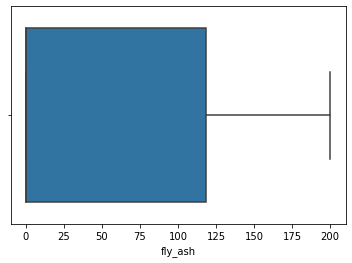

In [22]:
# Checking Outliers 
sns.boxplot(x=df['fly_ash'], data=df)

## Observation
* From here we can observe that this feature looks perfect ,there is no null or missing values present .

cement                               AxesSubplot(0.125,0.71587;0.168478x0.16413)
blast_furnace_slag                AxesSubplot(0.327174,0.71587;0.168478x0.16413)
fly_ash                           AxesSubplot(0.529348,0.71587;0.168478x0.16413)
water                             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
superplasticizer                    AxesSubplot(0.125,0.518913;0.168478x0.16413)
coarse_aggregate                 AxesSubplot(0.327174,0.518913;0.168478x0.16413)
fine_aggregate                   AxesSubplot(0.529348,0.518913;0.168478x0.16413)
age                              AxesSubplot(0.731522,0.518913;0.168478x0.16413)
concrete_compressive_strength       AxesSubplot(0.125,0.321957;0.168478x0.16413)
dtype: object

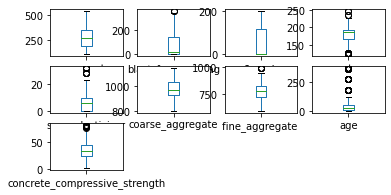

In [23]:
# let's check all the outliers 

df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)

## Observation
* almost four features contains outliers and next we are going to handle outliers 
* Before removing Outliers let's do small analysis and comparision how it works with target feature

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:orange; border:0' role="tab" aria-controls="home"><center>Data Visualization</center><a id=4></a></h3>

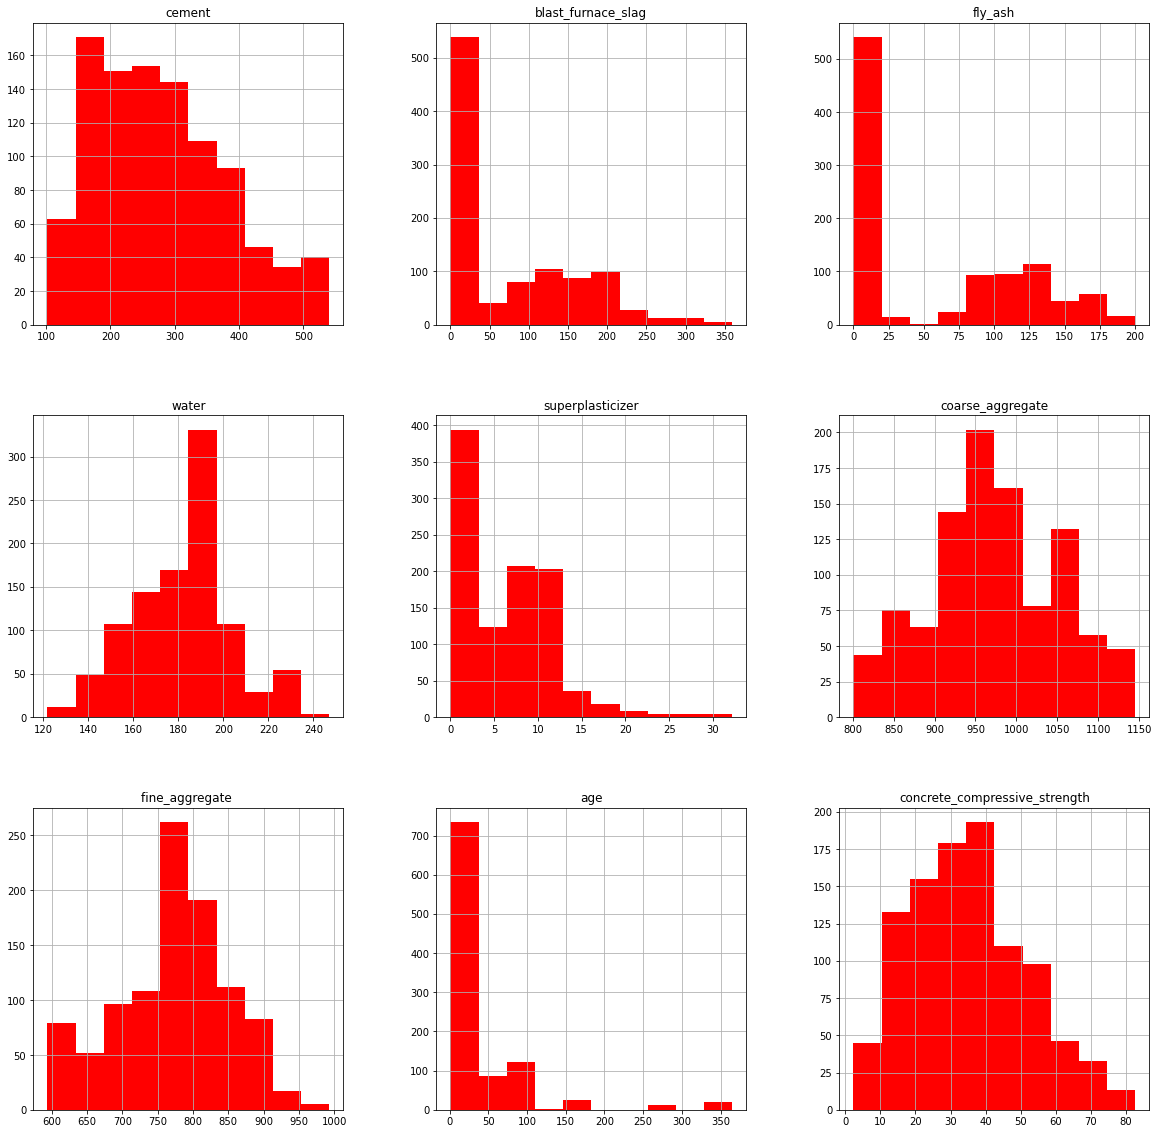

In [24]:
#Plotting the Histogram
df.hist(figsize=(20,20),color='r')
plt.show()

In [25]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

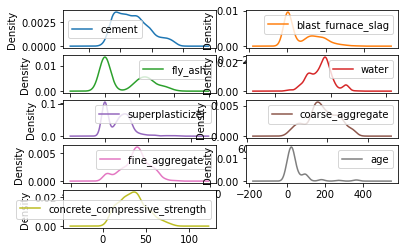

In [26]:
df.plot(kind='density', subplots=True, layout=(5,2), sharex=False, sharey=False)

None of the features have a Guassian Distribution. All of them have a positive skew except 'water' and 'fine_aggregate', which have negative skews

## Checking the pairwise relations of Features. 

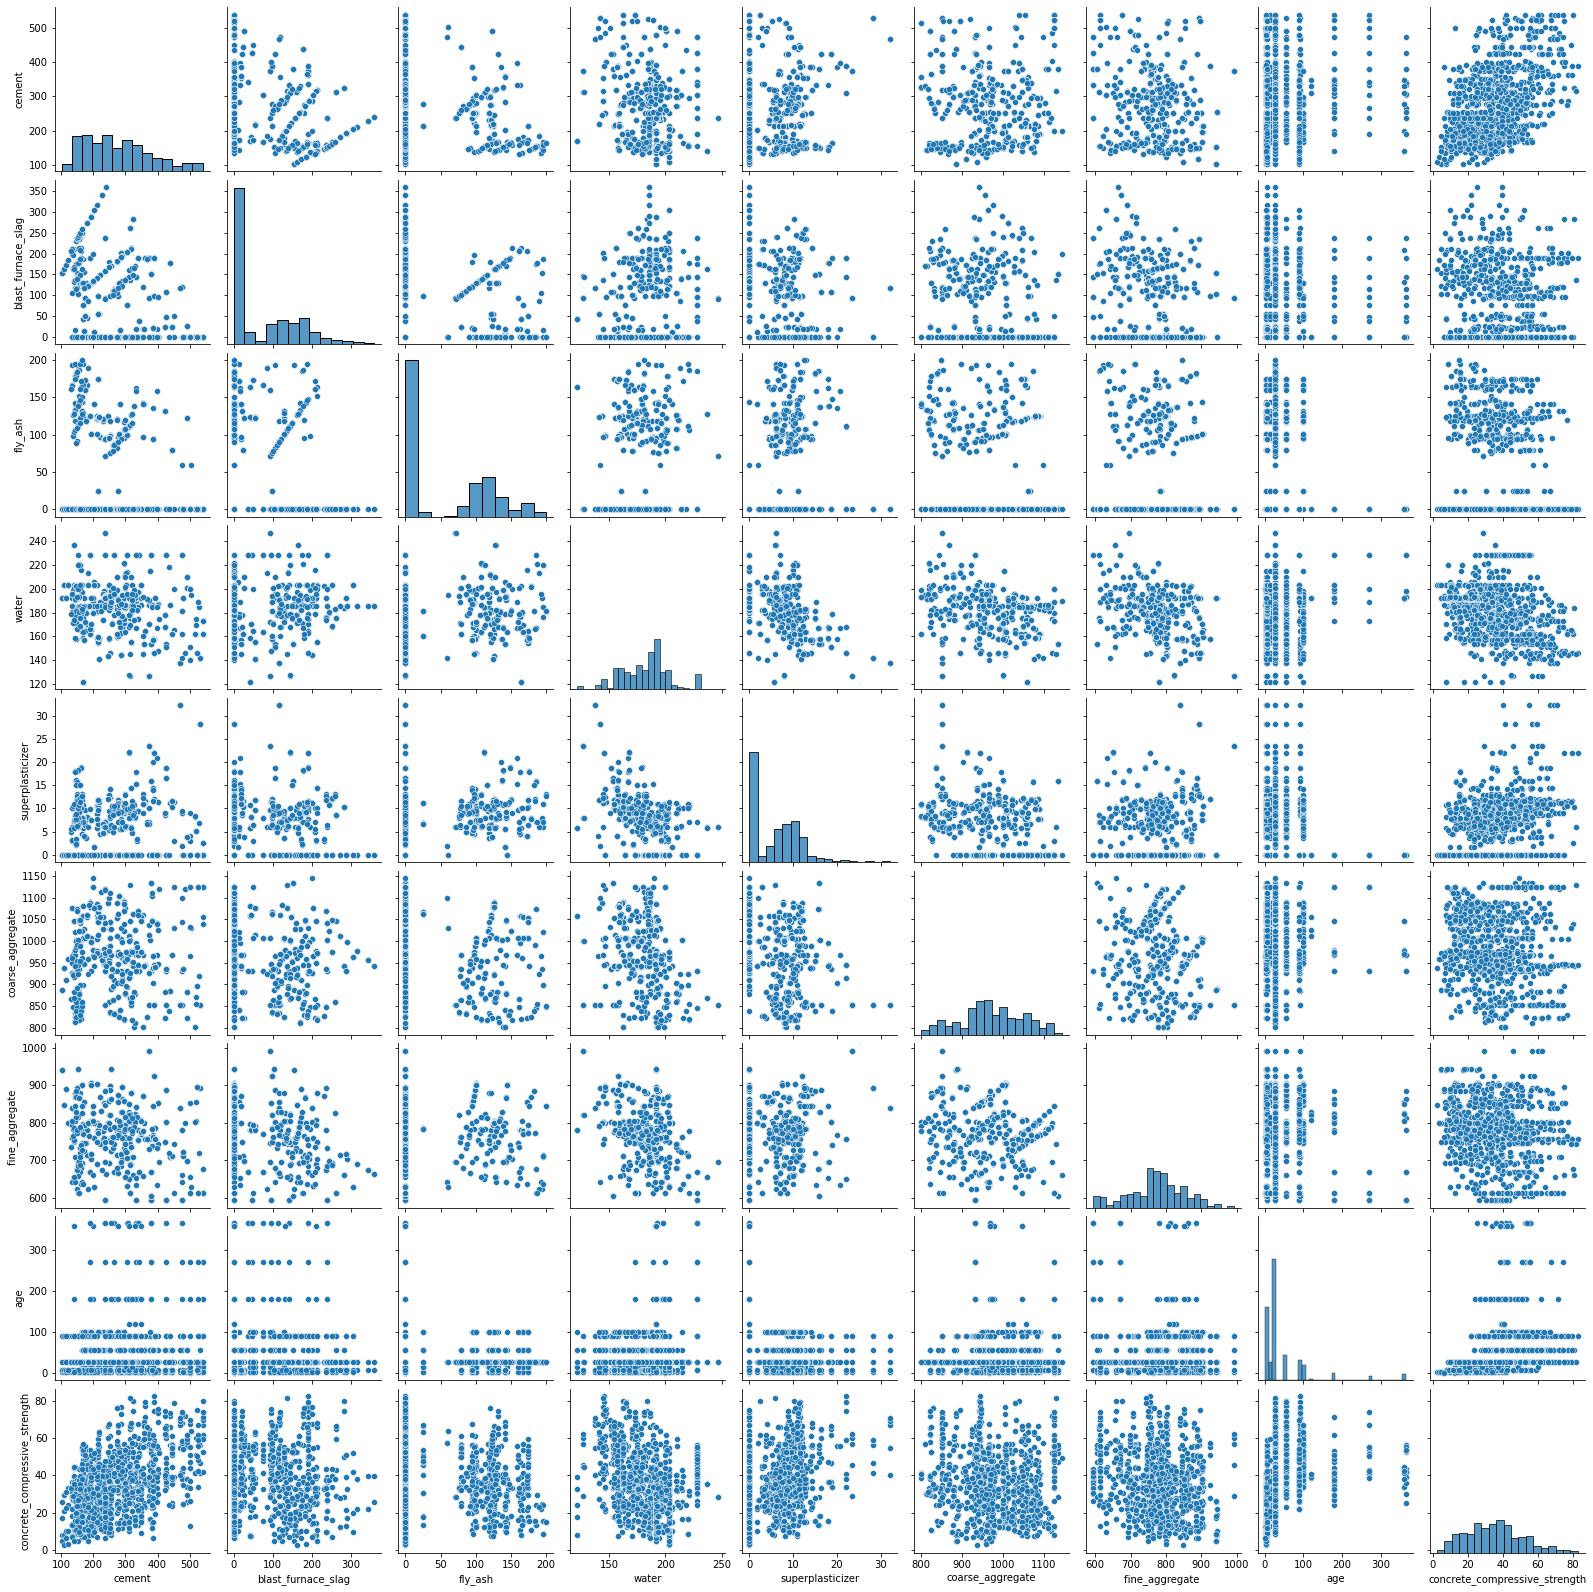

In [27]:
sns.pairplot(df)
plt.show()

There seems to be no high correlation between independant variables (features). This can be further confirmed by plotting the Pearson Correlation coefficients between the features.

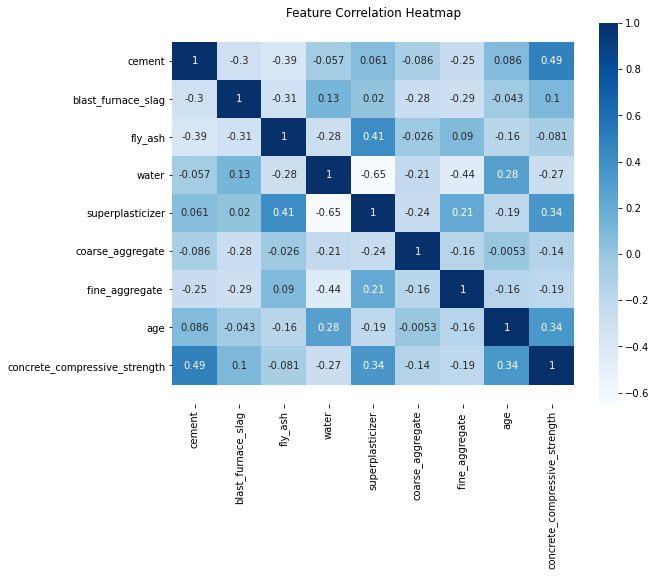

In [28]:
corr = df.corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


## Observations
* There are'nt any high correlations between Compressive strength and other features except for Cement, which should be the case for more strength.
* Age and Super plasticizer are the other two features which are strongly correlated with Compressive Strength.
* Super Plasticizer seems to have a negative high correlation with Water, positive correlations with Fly ash and Fine aggregate.
  > We can further analyze these correlations visually by plotting these relations.

In [29]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Compressive Strength Distribution')

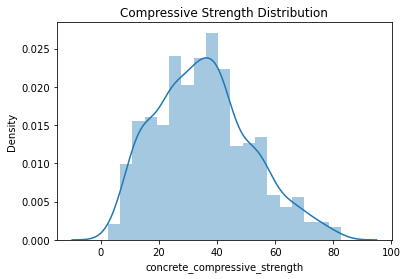

In [30]:

ax = sns.distplot(df.concrete_compressive_strength)
ax.set_title("Compressive Strength Distribution")

## Concrete_Compressive_Strength vs (Cement , Water)

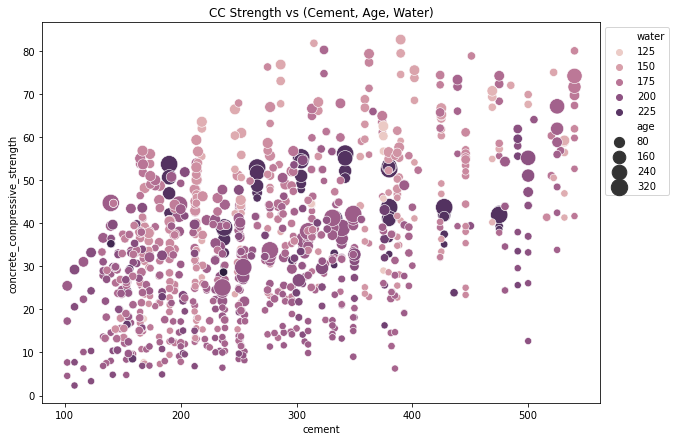

In [31]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="concrete_compressive_strength", x="cement", hue="water", size="age", data=df, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

### Observations from Strength vs (Cement, Age, Water)
* Compressive strength increases with amount of cement
* Compressive strength increases with age
* Cement with low age requires more cement for higher strength
* The older the cement is the more water it requires
* Concrete strength increases when less water is used in preparing it

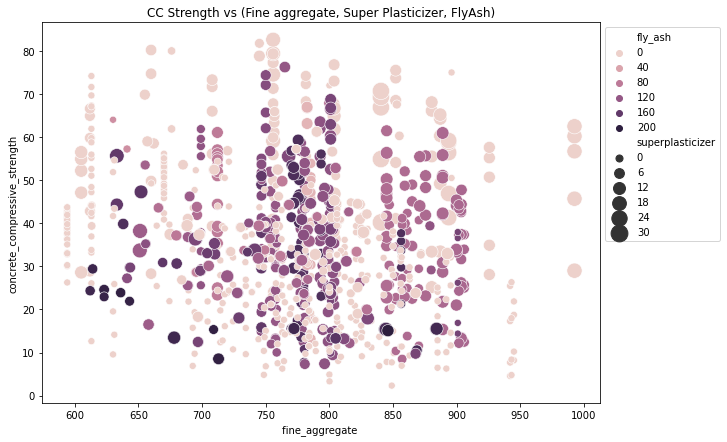

In [32]:

fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="concrete_compressive_strength", x="fine_aggregate ", hue="fly_ash", size="superplasticizer", 
                data=df, ax=ax, sizes=(50, 300))
ax.set_title("CC Strength vs (Fine aggregate, Super Plasticizer, FlyAsh)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

### Observations from CC Strength vs (Fine aggregate, Super Plasticizer, Water)
*  Strength decreases with increase in water, strength increases with increase in Super plasticizer (already from above plots)
* More Fine aggregate is used when less water, more Super plasticizer is used.
* Although we are making conclusions by observing the scatter plots, there is an underlying non linear interaction between features which we cannot visualize.
* We can visually understand 2D, 3D and max upto 4D plots (by 4D I mean color and size represented by features) as shown above, we can further use row wise and column wise plotting features by seaborn to do further analysis, but still we lack the ability to track all these correlations by ourselves. For this reason, we can turn to Machine Learning to capture these relations and give better insights into the problem.

Fom here we will start processing the data and feed it to machine learning models to correctly predict the Compressive Strength of Concrete given the input features.

In [33]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [34]:
df['coarse_aggregate'].value_counts()

932.0     57
852.1     35
968.0     29
1125.0    24
967.0     19
          ..
878.2      1
904.4      1
835.5      1
878.4      1
835.0      1
Name: coarse_aggregate, Length: 284, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


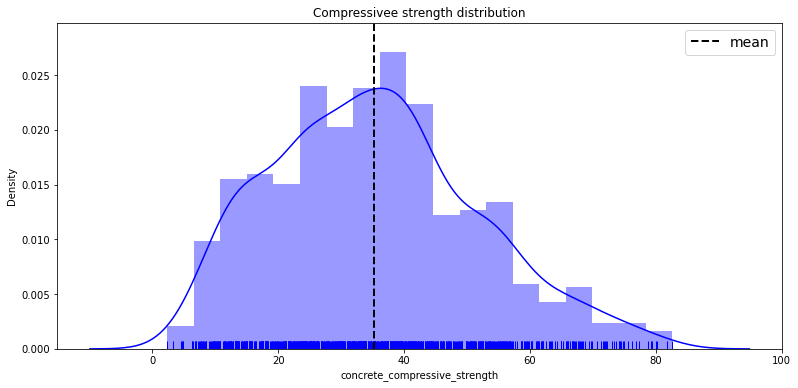

In [35]:
plt.figure(figsize=(13,6))
sns.distplot(df["concrete_compressive_strength"],color="b",rug=True)
plt.axvline(df["concrete_compressive_strength"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Compressivee strength distribution")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


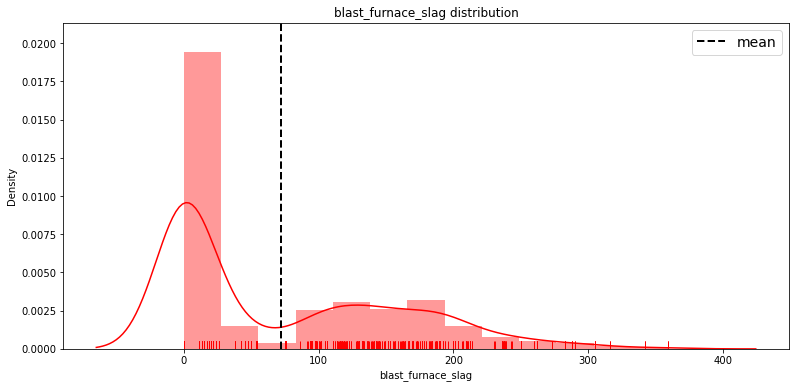

In [36]:
plt.figure(figsize=(13,6))
sns.distplot(df["blast_furnace_slag"],color="r",rug=True)
plt.axvline(df["blast_furnace_slag"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("blast_furnace_slag distribution")
plt.show()

## Water Distribution

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


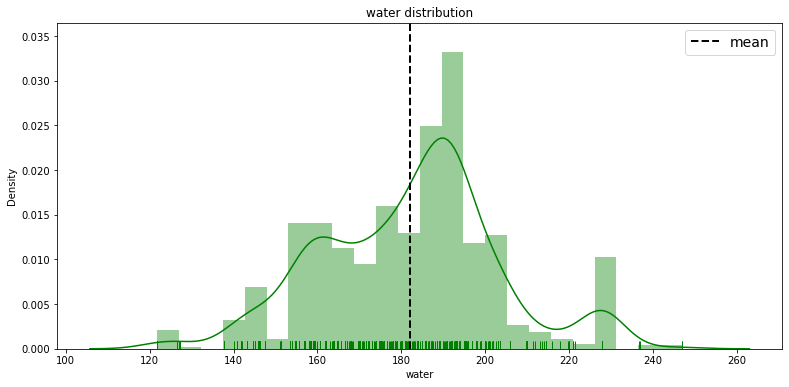

In [37]:
plt.figure(figsize=(13,6))
sns.distplot(df["water"],color="g",rug=True)
plt.axvline(df["water"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("water distribution")
plt.show()

In [38]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

## Ingredients Distribution

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2056

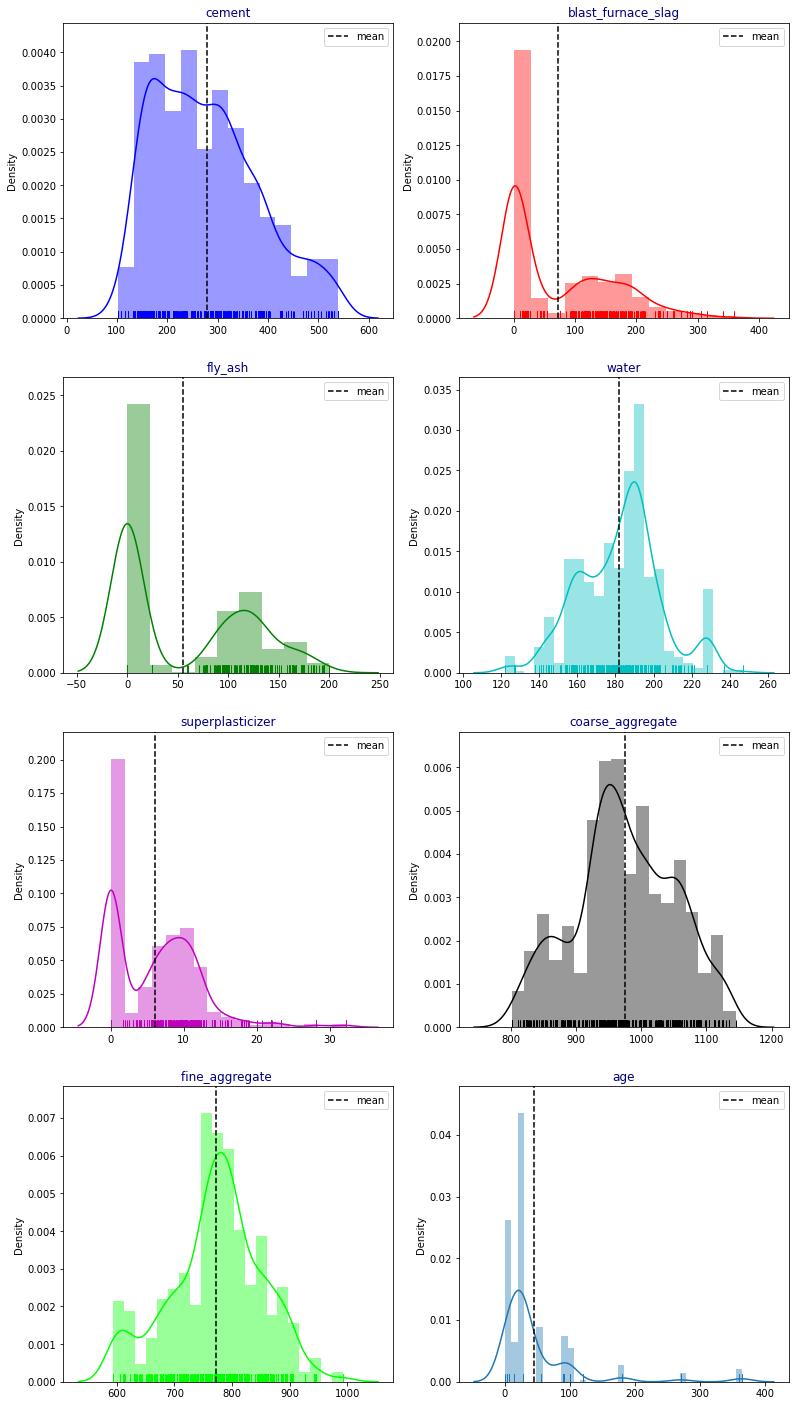

In [39]:
import itertools

cols = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age']
length = len(cols)
cs = ["b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

## Observations
* In input parameters, we can see water, coarse_agg and fine_agg have relatively better distributions (more gaussian or normal) than the other 4. 
* For the other 4 we might have to do some transformation such as log or even outlier treatment for extreme values.
* For the correlation matrix in next part we see some variables are correlated significantly (water and fly_ash, water and coarse_agg, coarse agg and fine_agg). 
* This might give rise to multicollinearity and that must be fixed before making the models that are not tree-based (such as Logistic Regression). 
* Tree models are not affected much by these problems.

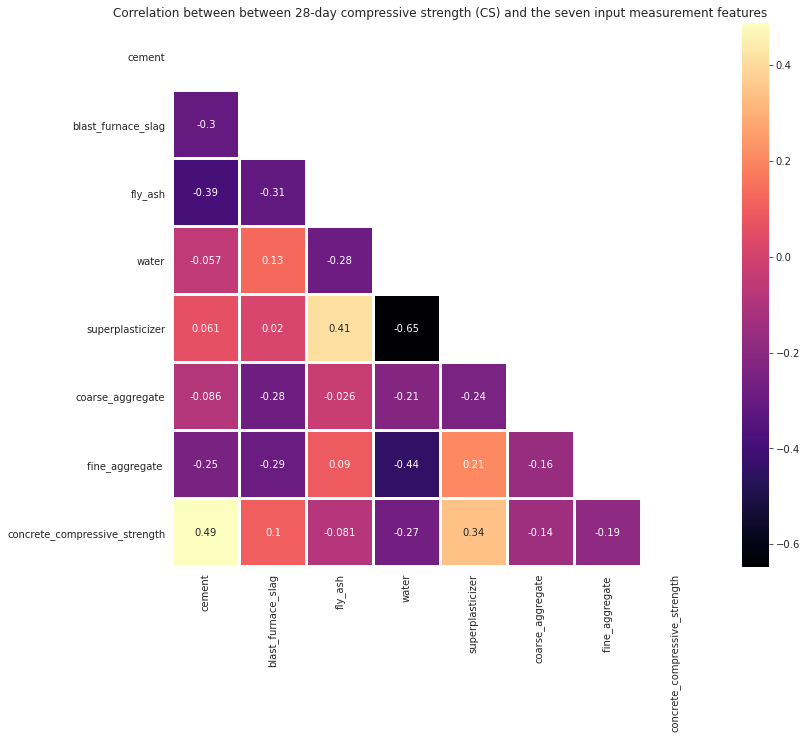

In [40]:
#For second group of questions we need to explore relationship between 7 ingredients and compressive strength. 
#So let us create a new dataframe with the required information

compressve_strength_df= df[['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ','concrete_compressive_strength']]

cor = compressve_strength_df.corr()

mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,10))

with sns.axes_style("white"):
    sns.heatmap(cor,annot=True,linewidth=2,
                mask = mask,cmap="magma")
plt.title("Correlation between between 28-day compressive strength (CS) and the seven input measurement features")
plt.show()

## Observations

* compressive_strength has a relatively higher and positive correlation with cement and fly_ash features compared to other features
* compressive_strength has a relatively higher and negative correlation with furnace_slag and water compared to other features
* We can say that the positive correlation might imply strength is being increased and vice-versa but we must consult a domain expert before reaching such conclusions because correlation does not imply causation.
* Cement, furnace_slag and fly_ash because they have the highest correlation coeffecients.

## Outliers Removal

In [41]:
#Creating a copy of our dataset
df1=df.copy()

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[2.50611568, 0.83647066, 0.86537497, ..., 1.20408109, 0.28031213,
        2.74868926],
       [2.50611568, 0.83647066, 0.86537497, ..., 1.20408109, 0.28031213,
        1.63667102],
       [0.51651597, 0.81804499, 0.86537497, ..., 2.22524592, 3.51856854,
        0.30839288],
       ...,
       [1.24775558, 0.78205201, 0.82684599, ..., 0.09105479, 0.28031213,
        0.70962603],
       [1.1461182 , 1.3312351 , 0.86537497, ..., 0.20188854, 0.28031213,
        0.15238816],
       [0.17001579, 0.33039827, 0.35470699, ..., 0.13932996, 0.28031213,
        0.17512002]])

In [43]:
threshold=3
print(np.where(z>3))

(array([  2,   3,   4,   6,  12,  17,  24,  25,  26,  30,  31,  33,  34,
        35,  41,  42,  56,  60,  61,  63,  65,  66,  76,  78,  94,  96,
       113, 115, 131, 133, 149, 151, 529, 535, 547, 560, 580, 586, 592,
       596, 598, 732, 745, 768, 774, 789, 795, 848, 911]), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 3, 3]))


In [44]:

df_new=df[(z<3).all(axis=1)]

In [45]:

#Checking the shape
print(df.shape,'\t\t',df_new.shape)

(1005, 9) 		 (956, 9)


## Observations
* From here we can observe 151 rows contains outliers and those outliers have been removed 

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:orange; border:0' role="tab" aria-controls="home"><center>Model Training</center><a id=5></a></h3>

In [46]:
X=df_new.drop('concrete_compressive_strength',axis=1)
y=df_new['concrete_compressive_strength']

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Scaling
Standardizing the data i.e. to rescale the features to have a mean of zero and standard deviation of 1.

In [48]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

The scaler is fit on the training data and not on testing data. Since, we are training our model on rescaled Training data and the model performs well when the testing data follows same distribution. And if the scaler is fit on testing data again, this would result in testing data having a different mean and standard deviation. Resulting in loss of performance.

In [49]:
# importing all the models 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import model_selection

In [50]:
# Linear Regression
lr = LinearRegression()
# Lasso Regression
lasso = Lasso()
# Ridge Regression
ridge = Ridge()
dtr = DecisionTreeRegressor()
br=BaggingRegressor(n_estimators=1000)
gbr=GradientBoostingRegressor(n_estimators=100)
rfr = RandomForestRegressor(n_estimators=100)

In [51]:
models=[]
models.append(('LinearRegression',lr))
models.append(('Lasso',lasso))
models.append(('Ridge',ridge))
models.append(('DecisionTreeRegressor',dtr))
models.append(('GradientBoostingRegressor',gbr))
models.append(('BaggingRegressor',br))
models.append(('RandomForestRegressor',rfr))


## Evaluation Metrics

Comparing the Root Mean Squared Error (RMSE), Mean Squared Error (MSE), Mean Absolute Error(MAE) and R2 Score.

In [52]:
from sklearn import metrics 
Model=[]
Score=[]
MAE=[]
MSE=[]
RMSE=[]
R2score=[]
for name,model in models:
    print('***********************',name,'************')
    Model.append(name)
    print('\n')
    model.fit(X_train,y_train)
    print(model)
    pred=model.predict(X_test)
    print('\n')
    sr=model.score(X_train,y_train)
    print('score',sr)
    Score.append(sr*100)
    print('\n')
    print('Performance Measures:')
    mae=metrics.mean_absolute_error(y_test, pred)
    print('MAE',mae)
    MAE.append(mae)
    mse=metrics.mean_squared_error(y_test, pred)
    print('MSE',mse)
    MSE.append(mse)
    rmse=np.sqrt(metrics.mean_squared_error(y_test, pred))
    print('RMSE',rmse)
    RMSE.append(rmse)
    r2score=metrics.r2_score(y_test,pred)
    print('R2-score',r2score)
    R2score.append(r2score)

*********************** LinearRegression ************


LinearRegression()


score 0.6962871232576304


Performance Measures:
MAE 6.349498424659163
MSE 69.57432937985642
RMSE 8.34112278892095
R2-score 0.6806071960085753
*********************** Lasso ************


Lasso()


score 0.6540017320586957


Performance Measures:
MAE 7.004380064006348
MSE 80.73721830392124
RMSE 8.98538915706611
R2-score 0.6293620539298629
*********************** Ridge ************


Ridge()


score 0.6962660439818151


Performance Measures:
MAE 6.350262444851135
MSE 69.57776819922802
RMSE 8.341328922853242
R2-score 0.6805914095227938
*********************** DecisionTreeRegressor ************


DecisionTreeRegressor()


score 0.9959478572904801


Performance Measures:
MAE 4.199921875
MSE 38.959615234375
RMSE 6.241763791940143
R2-score 0.8211492534236808
*********************** GradientBoostingRegressor ************


GradientBoostingRegressor()


score 0.9482710700973069


Performance Measures:
MAE 3.6532930880

In [53]:
result=pd.DataFrame({'models':Model,'score':Score,'MAE':MAE,'MSE':MSE,'RMSE':RMSE,'R2score':R2score},columns=['models','score','MAE','MSE','RMSE','R2score'])
result

models      score       MAE        MSE      RMSE  \
0           LinearRegression  69.628712  6.349498  69.574329  8.341123   
1                      Lasso  65.400173  7.004380  80.737218  8.985389   
2                      Ridge  69.626604  6.350262  69.577768  8.341329   
3      DecisionTreeRegressor  99.594786  4.199922  38.959615  6.241764   
4  GradientBoostingRegressor  94.827107  3.653293  23.589376  4.856890   
5           BaggingRegressor  98.376864  3.338855  21.773288  4.666186   
6      RandomForestRegressor  98.359705  3.373729  22.298687  4.722149   

    R2score  
0  0.680607  
1  0.629362  
2  0.680591  
3  0.821149  
4  0.891709  
5  0.900046  
6  0.897634

#### R2-score
The r2 score varies between 0 and 100%. It is closely related to the MSE 
” …the proportion of the variance in the dependent variable that is predictable from the independent variable(s).”

#### MSE 
Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error. Error in this case means the difference between the observed values y1, y2, y3, … and the predicted ones pred(y1), pred(y2), pred(y3), … We square each difference (pred(yn) – yn)) ** 2 so that negative and positive values do not cancel each other out.

### Feature Importance

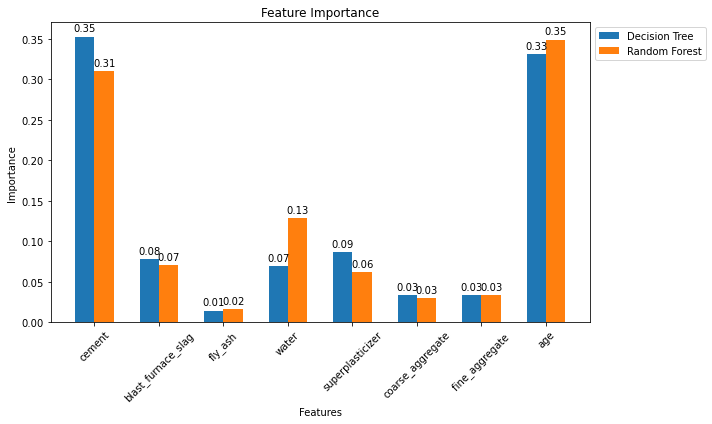

In [54]:

feature_dtr = dtr.feature_importances_
feature_rfr = rfr.feature_importances_
req_col_names=['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age']
labels = req_col_names

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x-(width/2), feature_dtr, width, label='Decision Tree')
rects2 = ax.bar(x+(width/2), feature_rfr, width, label='Random Forest')

ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

Cement and Age are treated as the most important features by tree based models. Flyash, Coarse and Fine aggregates are least important factors when predicting the strength of Concrete.


We have used all 7 features listed below in our model.

feature_list = ['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer','coarse_agg', 'fine_agg']

We could have eliminated a few and tried to build different models. At the end we have found the most important features and also that 5 features contribute to 95% prediction in our model. We can try another model with these 5 features.

### Hyper-parameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
# Inspect dt' s hyperparameters
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [57]:
# Define a grid of hyperparameter 'params_dt'
params_dt = {
             "max_depth": [None, 1, 2, 3, 4, 5, 6, 7], 
             "min_samples_leaf": range(1, 3),
             "min_samples_split": range(2, 10),
             "max_leaf_nodes": range(10,18)}
                
# Instantiate 'grid_dt'
grid_dt = GridSearchCV(estimator=dtr, 
                       param_grid=params_dt,
                       cv= 7)

# Fit 'grid_dt' to the training set
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7],
                         'max_leaf_nodes': range(10, 18),
                         'min_samples_leaf': range(1, 3),
                         'min_samples_split': range(2, 10)})

In [58]:
# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_ 
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': None, 'max_leaf_nodes': 17, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [59]:

# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

# Predict the test set labels
y_pred = best_model.predict(X_test)

# Evaluate the test set RMSE
rmse_test=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Print the test set RMSE
print('Test set RMSE of dt: {:.2f}'.format(rmse_test))

Test set RMSE of dt: 9.60


* Error is basically how far/different your predicted values from the actual values of the dataset.

* Test error is the error when you get when you run a trained model on a set of data that it has previously never been exposed to. It gives us a good idea about the performance of the model before it is shipped to production.

* The ideal depth of our model is 7. I have used Grid Search and cross validation to determine the best hyperparameters of our model. A model hyperparameter is a configuration that is external to the model and whose value cannot be estimated from data.

* Grid search in basic sense, is a brute force method to estimate hyperparameters. Grid Search tries all possible combinations of hyperparameters we specify intially and then finds the one with the least error.
* We have caluculated the Root Mean Square Error (RMSE) for our Decision Tree model on the test set and the value we got is 9.6 units.

* Residuals in a machine learning model are the differences between observed and predicted values of data. RMSE is a measure of how spread out these residuals are. Lower values of RMSE indicate better fit.

We see below that the Random Forest Model has a RMSE of 5 compared to 9.6 of the Decision Tree Model. This indicated that the Random Forest Model predicts better than the Decision Tree Model. This is because Random forests consist of multiple single trees, each based on a random sample of the training data.

In [60]:
#from sklearn.metrics import mean_squared_error as MSE 
#from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state= 42)

In [61]:
# Inspect rf' s hyperparameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [62]:
# Define a grid of hyperparameter 'params_rf'
params_rf = {'n_estimators': [70,75,80,85],
             'max_depth': [9,10,11] ,
             'min_samples_leaf': range(2, 5), 
             'max_features': ['auto','log2']
            }

# Instantiate 'grid_rf'
grid_rf = GridSearchCV(estimator=rf, 
                       param_grid=params_rf,
                       cv=5, 
                       scoring='neg_mean_squared_error', 
                       verbose=1,
                       n_jobs=-1)

# Fit 'grid_rf' to the training set
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [9, 10, 11],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(2, 5),
                         'n_estimators': [70, 75, 80, 85]},
             scoring='neg_mean_squared_error', verbose=1)

In [63]:
# Extract best hyperparameters from 'grid_rf'
best_hyperparams = grid_rf.best_params_ 
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 85}


In [64]:
# Extract best model from 'grid_rf'
best_model1 = grid_rf.best_estimator_

# Predict the test set labels
y_pred = best_model1.predict(X_test)

# Evaluate the test set RMSE
# Evaluate the test set RMSE
rmse_test=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 5.00


After Analysing and comaparing with all other algorithms and models , Random forest regressor is best one 


1. Concrete is one of preferred choice among contractors and builders for construction projects. The right combination of constituents is important to get a premium quality concrete mix. Reliability and durability are things that cannot be compromised upon infrastructure projects.

2. Using machine learning models, we were able to deduce the importance of concrete mix constituents on compressive strength. The Random Forest model, the feature importance showed that cement, fly_ash and water are key ingredients that affect compressive strength.

3. Already such inferences can provide a lot of business value to a prospective client. More research and work with engineers can add tremendous value by finding answers to problems.